In [41]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv(r"C:\Users\Shriram\Downloads\SOC LAB3\2\anneal.data",header=None)
df1 = df.select_dtypes(include=['int', 'float'])
print(df)
print(df1)

    0  1  2   3   4  5  6  7   8  9   ... 29 30     31     32      33    34  \
0    ?  C  A   8   0  ?  S  ?   0  ?  ...  ?  ?   COIL  0.700   610.0     0   
1    ?  C  R   0   0  ?  S  2   0  ?  ...  ?  ?   COIL  3.200   610.0     0   
2    ?  C  R   0   0  ?  S  2   0  ?  ...  ?  ?  SHEET  0.700  1300.0   762   
3    ?  C  A   0  60  T  ?  ?   0  ?  ...  ?  ?   COIL  2.801   385.1     0   
4    ?  C  A   0  60  T  ?  ?   0  ?  ...  ?  ?  SHEET  0.801   255.0   269   
..  .. .. ..  ..  .. .. .. ..  .. ..  ... .. ..    ...    ...     ...   ...   
793  ?  C  A   0  50  T  ?  ?   0  ?  ...  ?  ?   COIL  1.001    50.0     0   
794  ?  C  ?   0   0  ?  S  1   0  ?  ...  ?  ?  SHEET  0.699  1300.0  4880   
795  ?  C  A   0   0  ?  S  2   0  ?  ...  ?  ?   COIL  0.400   609.9     0   
796  ?  C  A   0   0  ?  S  2   0  ?  ...  ?  ?  SHEET  3.200   610.0  4880   
797  ?  C  R   0   0  ?  S  2   0  ?  ...  ?  ?  SHEET  1.599  1500.0  4170   

    35 36 37 38  
0    ?  0  ?  3  
1    ?  0  ?  3

<Axes: >

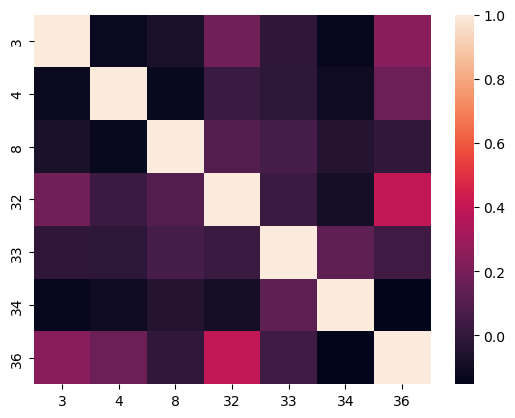

In [46]:
# dataset correlation heatmap
sns.heatmap(df.corr())

In [47]:
# unique values
for i in df:
    print(i," has these unique values:",df[i].unique())

0  has these unique values: ['?' 'TN' 'ZS']
1  has these unique values: ['C']
2  has these unique values: ['A' 'R' 'K' 'S' '?' 'W' 'M' 'V']
3  has these unique values: [ 8  0 10 55 70  3  4 45  6 65]
4  has these unique values: [ 0 60 45 80 70 85 50]
5  has these unique values: ['?' 'T']
6  has these unique values: ['S' '?' 'A']
7  has these unique values: ['?' '2' '3' '1' '5']
8  has these unique values: [  0 310 350 500 600 400 300 700]
9  has these unique values: ['?' 'N']
10  has these unique values: ['?' 'P']
11  has these unique values: ['G' 'E' 'D' 'F' '?']
12  has these unique values: ['?' '2' '1']
13  has these unique values: ['?' 'Y']
14  has these unique values: ['?' 'Y']
15  has these unique values: ['?' 'Y']
16  has these unique values: ['?' 'B' 'M']
17  has these unique values: ['?' 'Y']
18  has these unique values: ['?']
19  has these unique values: ['?' 'C']
20  has these unique values: ['?' 'P']
21  has these unique values: ['?' 'Y']
22  has these unique values: ['?']


In [48]:
# missing values
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64


In [49]:
df.dtypes

0      object
1      object
2      object
3       int64
4       int64
5      object
6      object
7      object
8       int64
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32    float64
33    float64
34      int64
35     object
36      int64
37     object
38     object
dtype: object

In [50]:
# distinct elements
df.nunique()

0      3
1      1
2      8
3     10
4      7
5      2
6      3
7      5
8      8
9      2
10     2
11     5
12     3
13     2
14     2
15     2
16     3
17     2
18     1
19     2
20     2
21     2
22     1
23     2
24     2
25     1
26     4
27     2
28     1
29     1
30     1
31     2
32    49
33    68
34    23
35     3
36     3
37     3
38     5
dtype: int64

In [51]:
# missing values
missing_values = df.isnull().sum()
print(missing_values)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64


In [52]:
# Filling empty values
df.fillna(df.median(), inplace=True)

In [53]:
#replacing question mark
df.replace("?", "0", inplace=True)
df.replace("Na", "0", inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0,C,A,8,0,0,S,0,0,0,...,0,0,COIL,0.700,610.0,0,0,0,0,3
1,0,C,R,0,0,0,S,2,0,0,...,0,0,COIL,3.200,610.0,0,0,0,0,3
2,0,C,R,0,0,0,S,2,0,0,...,0,0,SHEET,0.700,1300.0,762,0,0,0,3
3,0,C,A,0,60,T,0,0,0,0,...,0,0,COIL,2.801,385.1,0,0,0,0,3
4,0,C,A,0,60,T,0,0,0,0,...,0,0,SHEET,0.801,255.0,269,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0,C,A,0,50,T,0,0,0,0,...,0,0,COIL,1.001,50.0,0,Y,0,0,3
794,0,C,0,0,0,0,S,1,0,0,...,0,0,SHEET,0.699,1300.0,4880,0,0,0,3
795,0,C,A,0,0,0,S,2,0,0,...,0,0,COIL,0.400,609.9,0,0,0,0,3
796,0,C,A,0,0,0,S,2,0,0,...,0,0,SHEET,3.200,610.0,4880,0,0,0,3


# WITHOUT PCA

In [64]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.preprocessing import StandardScaler

In [55]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [56]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
# Apply KNN on the original dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [59]:
# Make predictions
y_pred = knn.predict(X)
# Calculate accuracy
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.9724310776942355


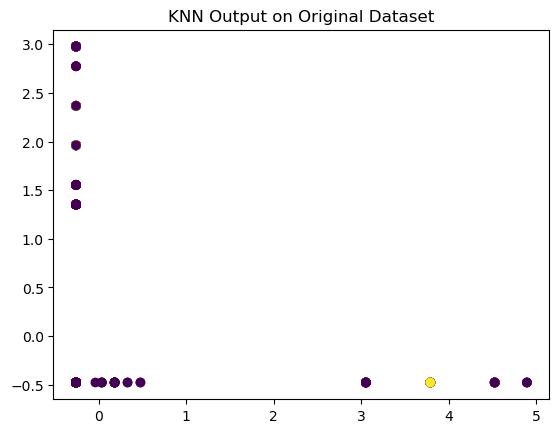

In [60]:
# Visualize KNN output
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('KNN Output on Original Dataset')
plt.show()

In [66]:
# Extract the 2-D coordinates of the original data points
X_coords = X[:, :2]

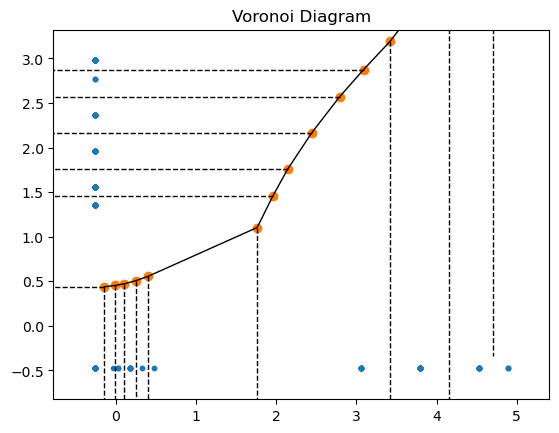

In [68]:
# Make Voronoi diagram
vor = Voronoi(X_coords)
voronoi_plot_2d(vor)
plt.title('Voronoi Diagram')
plt.show()

# WITH PCA

In [87]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 

In [70]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [71]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
# Perform PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

In [73]:
# Apply KNN on the output dataset of PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y)

KNeighborsClassifier(n_neighbors=3)

In [74]:
# Make predictions
y_pred = knn.predict(X_pca)

In [75]:
# Calculate accuracy
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.9736842105263158


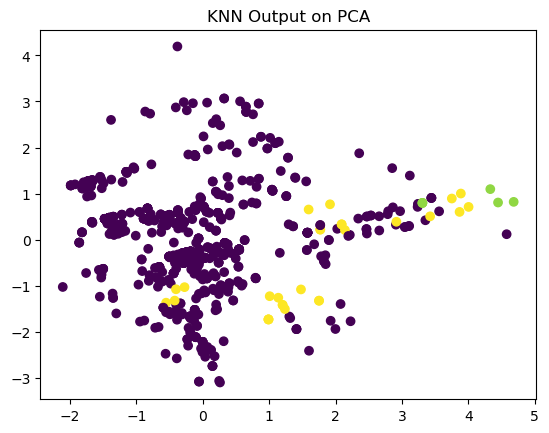

In [76]:
# Visualize KNN output
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('KNN Output on PCA')
plt.show()

In [78]:
X_coords = X_pca[:, :2]

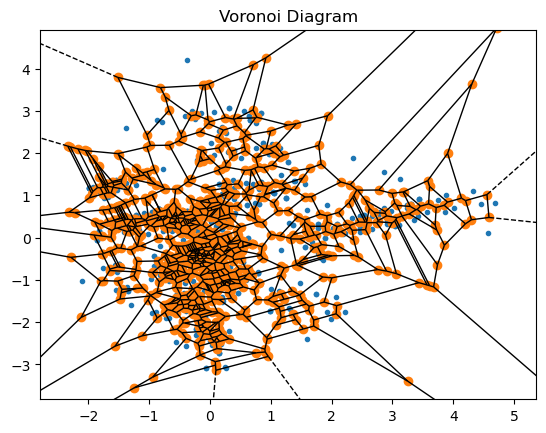

In [80]:
# Make Voronoi diagram
vor = Voronoi(X_coords)
voronoi_plot_2d(vor)
plt.title('Voronoi Diagram')
plt.show()

In [81]:
k_values = [1, 3, 5, 7, 9] 

In [83]:
distance_metrics = ['euclidean', 'manhattan', 'minkowski'] 

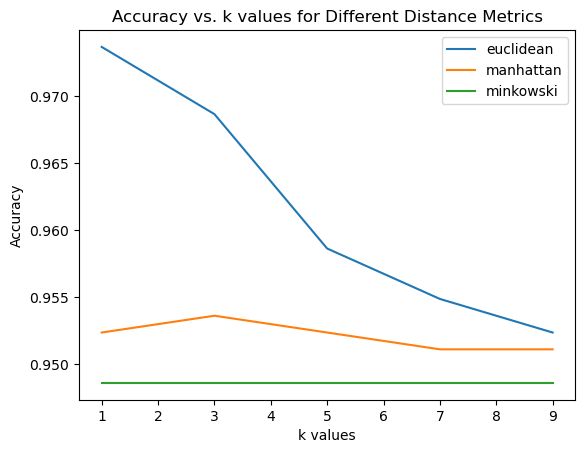

In [90]:
# Plotting accuracy for each distance metric 
for metric in distance_metrics: 
    accuracy_values = [] 
    for k in k_values: 
    # Create and fit the k-NN model 
        if metric == 'minkowski': 
            KNeighborsClassifier (n_neighbors=k, metric=metric, p=3) 
        else: # For other metrics 
            knn = KNeighborsClassifier (n_neighbors=k, metric=metric) 
        knn.fit(X_pca, y_pred) 
        # Predict on the test set 
        y_pred = knn.predict(X_pca)
        # Calculate accuracy 
        accuracy = metrics.accuracy_score (y,y_pred) 
        accuracy_values.append(accuracy) 
    # Plot the Lineplot 
    plt.plot(k_values, accuracy_values, label=metric) 
plt.xlabel('k values') 
plt.ylabel('Accuracy') 
plt.title('Accuracy vs. k values for Different Distance Metrics') 
plt.legend() 
plt.show() 

In [91]:
#Comparison of average and distance metric
average_accuracy=np.mean(accuracy_values)
distance_metric_accuracy=accuracy_values[0] #Assuming you want the accuracy for the last k value

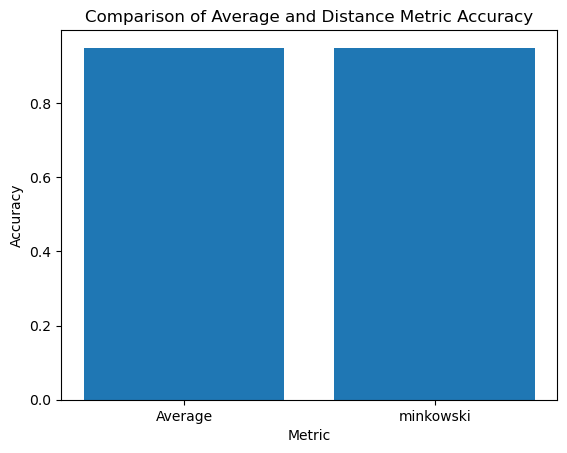

In [94]:
plt.bar(['Average', distance_metrics [-1]], [average_accuracy, distance_metric_accuracy]) 
plt.xlabel('Metric') 
plt.ylabel('Accuracy') 
plt.title('Comparison of Average and Distance Metric Accuracy') 
plt.show() 